In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [5]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [6]:
import math
import statsmodels.api as sm

In [10]:
def logistic(t):
    return 1/(1+np.exp(-1.0*t))

t = np.linspace(-6,6,500)

y = np.array([logistic(ele) for ele in t])

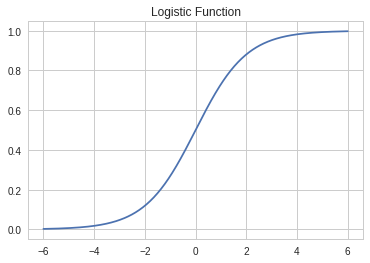

In [12]:
plt.plot(t,y)
plt.title('Logistic Function')

In [14]:
df = sm.datasets.fair.load_pandas().data

In [15]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [16]:
def affair_check(x):
    if x == 0:
        return 0
    else:
        return 1

In [25]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [29]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [30]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


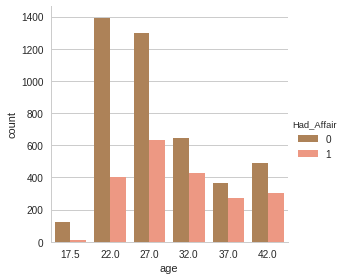

In [32]:
sns.factorplot('age',data = df,hue = 'Had_Affair',palette = 'spring_d',kind='count')

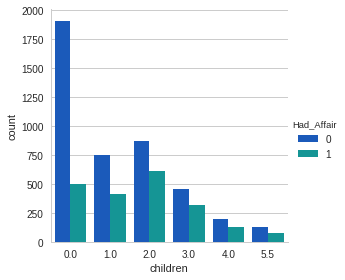

In [34]:
sns.factorplot('children',data = df,hue = 'Had_Affair',palette = 'winter',kind='count')

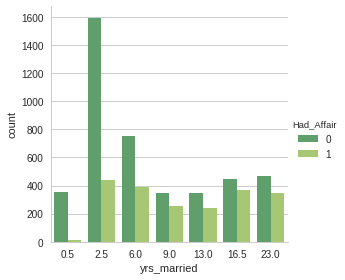

In [36]:
sns.factorplot('yrs_married',data = df,hue = 'Had_Affair',palette = 'summer',kind='count')

In [37]:
#handling the dataset 

df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [39]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis = 1)

In [70]:
X

,affairs,age,children,educ,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6,occ1,occ2,occ3,occ4,occ5,occ6,rate_marriage,religious,yrs_married
0,0.111111,32.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,9.0
1,3.230769,27.0,3.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,13.0
2,1.400000,22.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,2.5
3,0.727273,37.0,4.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,16.5
4,4.666666,27.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,9.0
5,4.666666,27.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,9.0
6,0.852174,37.0,5.5,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,23.0
7,1.826086,37.0,5.5,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,23.0
8,4.799999,22.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.5
9,1.333333,27.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,6.0


In [51]:
#getting the dummies and concatenate it with the dataframe 

occ_dummies = pd.get_dummies(df['occupation'])
husb_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [52]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [53]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
husb_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [58]:
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [63]:
dummies = pd.concat([occ_dummies,husb_occ_dummies],axis = 1)

In [69]:
X.drop(['occ1','occ2','occ3','occ4','occ5','occ6','hocc1','hocc2','hocc3','hocc4','hocc5','hocc6'],axis = 1)

,affairs,age,children,educ,rate_marriage,religious,yrs_married
0,0.111111,32.0,3.0,17.0,3.0,3.0,9.0
1,3.230769,27.0,3.0,14.0,3.0,1.0,13.0
2,1.400000,22.0,0.0,16.0,4.0,1.0,2.5
3,0.727273,37.0,4.0,16.0,4.0,3.0,16.5
4,4.666666,27.0,1.0,14.0,5.0,1.0,9.0
5,4.666666,27.0,0.0,14.0,4.0,2.0,9.0
6,0.852174,37.0,5.5,12.0,5.0,2.0,23.0
7,1.826086,37.0,5.5,12.0,5.0,2.0,23.0
8,4.799999,22.0,0.0,12.0,3.0,2.0,2.5
9,1.333333,27.0,0.0,16.0,3.0,1.0,6.0


In [66]:
X.head()

,affairs,age,children,educ,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6,occ1,occ2,occ3,occ4,occ5,occ6,rate_marriage,religious,yrs_married
0,0.111111,32.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,9.0
1,3.230769,27.0,3.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,13.0
2,1.400000,22.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,2.5
3,0.727273,37.0,4.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,16.5
4,4.666666,27.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,9.0


In [67]:
Y = df.Had_Affair

In [72]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [74]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis = 1)

In [76]:
X

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,1.333333


In [78]:
X = pd.concat([X,dummies],axis = 1)

In [79]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [80]:
X = X.drop(['occ1','hocc1','affairs'],axis = 1)

In [81]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [82]:
log_model = LogisticRegression()

In [84]:
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0])

In [85]:
log_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
#accuracy of the model
log_model.score(X,Y)

0.72588752748978946

In [88]:
log_model2 = LogisticRegression()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

log_model2.fit(X_train,Y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
prediction = log_model2.predict(X_test)

In [90]:
print(prediction)

[0 1 1 ..., 0 0 0]


In [93]:
log_model.coef_

array([[-0.69792413, -0.05636463,  0.10391904,  0.01816224, -0.36851766,
         0.00875505,  0.29805226,  0.60799273,  0.34622168,  0.94250511,
         0.90569949,  0.21860633,  0.32451947,  0.18830516,  0.21180497,
         0.21469066]])

In [98]:
coef_df = DataFrame(list(zip(X.columns,np.transpose(log_model.coef_))))

In [99]:
coef_df

,0,1
0,rate_marriage,[-0.697924125998]
1,age,[-0.0563646299078]
2,yrs_married,[0.103919041638]
3,children,[0.0181622363802]
4,religious,[-0.368517662336]
5,educ,[0.00875505261517]
6,occ2,[0.298052262971]
7,occ3,[0.607992729515]
8,occ4,[0.346221679741]
9,occ5,[0.942505111823]


In [102]:
#to get accuracy using metrics

print(metrics.accuracy_score(Y_test,prediction))

0.725502512563


In [103]:
#72.5% is the accuracy of the model for that data